In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Step 2: Load the dataset
df = pd.read_csv("youtube_channel_data.csv")

# Show first 5 rows
df.head()


,Video_ID,Title,Views,Likes,Dislikes,Comments,Upload_Date,Duration (mins),Tags,Category,Subscribers_Gained
0,v101,How to Learn Python Fast,105000,4500,200,300,2023-04-01,12,"Python, Programming",Education,1500
1,v102,Python Project for Beginners,98000,3900,180,250,2023-04-10,10,"Python, Project",Education,1300
2,v103,Funniest Coding Memes,250000,15000,300,1800,2023-05-01,5,"Coding, Memes",Entertainment,2500
3,v104,Learn Data Science in 10 Mins,170000,7200,220,950,2023-06-15,10,"Data Science, ML",Education,1900
4,v105,Day in Life of a Data Analyst,130000,6100,150,500,2023-07-05,8,"Vlog, Data Analyst",Lifestyle,1700


In [3]:
# Step 3: Dataset Info & Null Check
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Video_ID            5 non-null      object
 1   Title               5 non-null      object
 2   Views               5 non-null      int64 
 3   Likes               5 non-null      int64 
 4   Dislikes            5 non-null      int64 
 5   Comments            5 non-null      int64 
 6   Upload_Date         5 non-null      object
 7   Duration (mins)     5 non-null      int64 
 8   Tags                5 non-null      object
 9   Category            5 non-null      object
 10  Subscribers_Gained  5 non-null      int64 
dtypes: int64(6), object(5)
memory usage: 572.0+ bytes


In [4]:
# Step 4: Missing values
df.isnull().sum()


Video_ID              0
Title                 0
Views                 0
Likes                 0
Dislikes              0
Comments              0
Upload_Date           0
Duration (mins)       0
Tags                  0
Category              0
Subscribers_Gained    0
dtype: int64

In [5]:
# Step 5: Statistical Summary
df.describe()


,Views,Likes,Dislikes,Comments,Duration (mins),Subscribers_Gained
count,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000
mean,150600.000000,7340.000000,210.000000,760.00000,9.000000,1780.000000
std,62304.092963,4475.823946,56.568542,643.62256,2.645751,460.434577
min,98000.000000,3900.000000,150.000000,250.00000,5.000000,1300.000000
25%,105000.000000,4500.000000,180.000000,300.00000,8.000000,1500.000000
50%,130000.000000,6100.000000,200.000000,500.00000,10.000000,1700.000000
75%,170000.000000,7200.000000,220.000000,950.00000,10.000000,1900.000000
max,250000.000000,15000.000000,300.000000,1800.00000,12.000000,2500.000000


In [6]:
#Which video has the highest views?
top_view = df[df['Views'] == df['Views'].max()]
top_view[['Title', 'Views']]


,Title,Views
2,Funniest Coding Memes,250000


C:\Users\hp\AppData\Local\Temp\ipykernel_10624\1268211909.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Title', x='Views', data=top5, palette='crest')


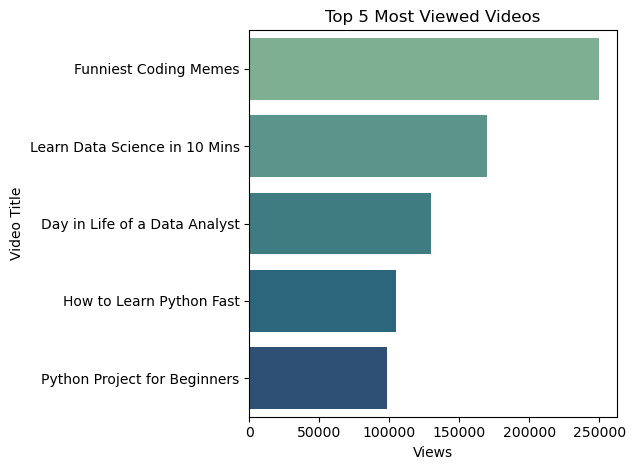

In [7]:
#Top 5 Most Viewed Videos
top5 = df.sort_values(by='Views', ascending=False).head(5)
sns.barplot(y='Title', x='Views', data=top5, palette='crest')
plt.title("Top 5 Most Viewed Videos")
plt.xlabel("Views")
plt.ylabel("Video Title")
plt.tight_layout()
plt.show()


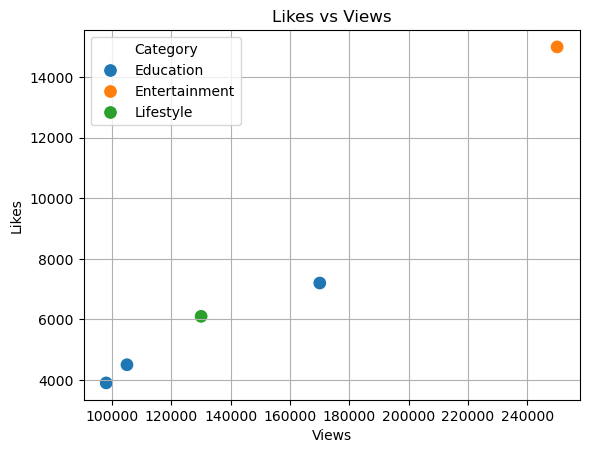

In [8]:
#Likes vs Views (Engagement)
sns.scatterplot(data=df, x='Views', y='Likes', hue='Category', s=100)
plt.title("Likes vs Views")
plt.grid(True)
plt.show()


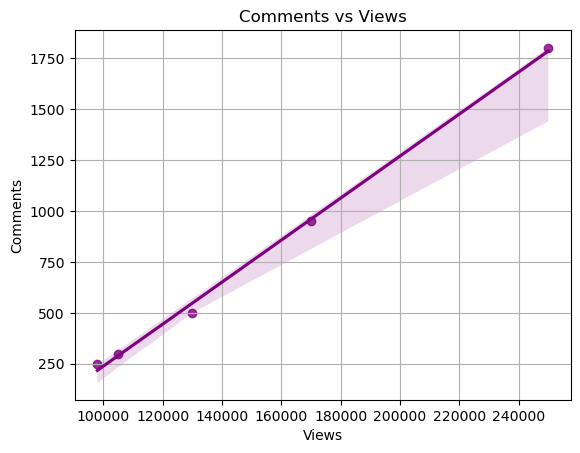

In [9]:
#Comments vs Views
sns.regplot(data=df, x='Views', y='Comments', color='purple')
plt.title("Comments vs Views")
plt.grid(True)
plt.show()


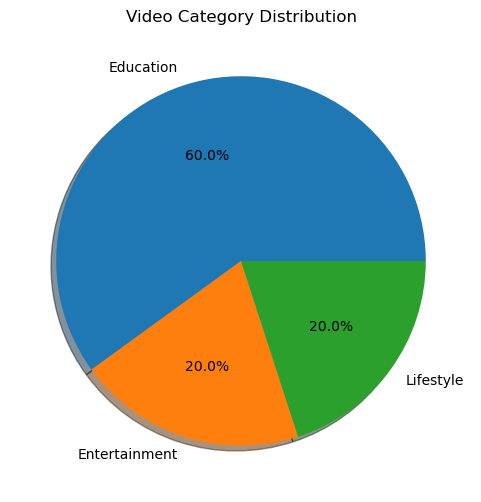

In [10]:
# Category-wise Video Count
df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), shadow=True)
plt.title("Video Category Distribution")
plt.ylabel("")
plt.show()


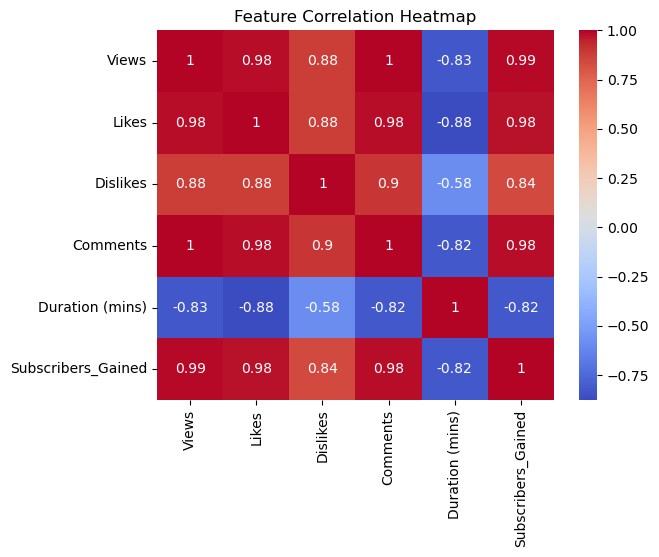

In [11]:
#Correlation Heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


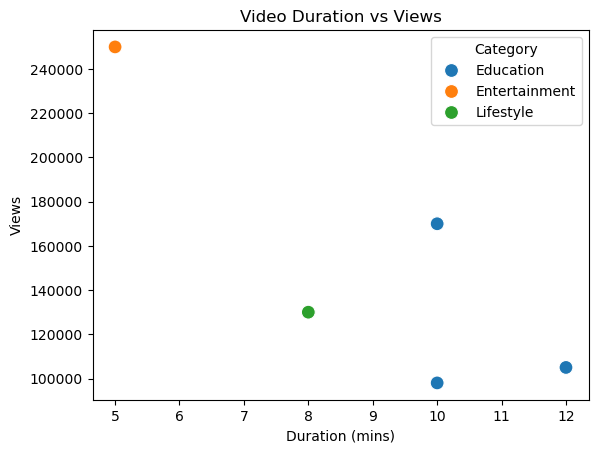

In [12]:
#Duration vs Views
sns.scatterplot(data=df, x='Duration (mins)', y='Views', hue='Category', s=100)
plt.title("Video Duration vs Views")
plt.show()


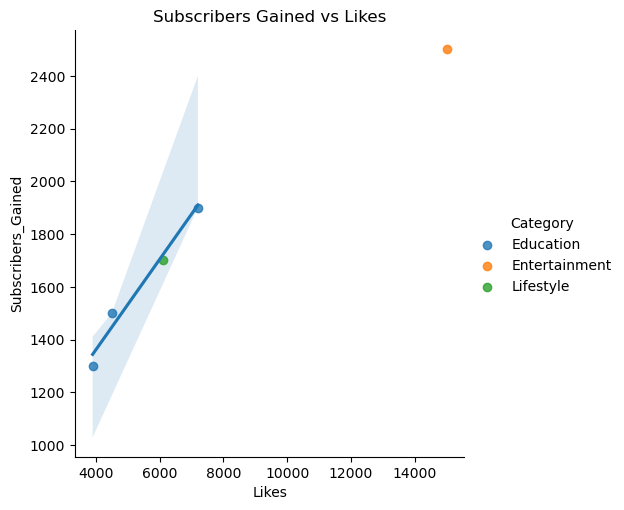

In [13]:
#Subscribers Gained vs Likes
sns.lmplot(data=df, x='Likes', y='Subscribers_Gained', hue='Category')
plt.title("Subscribers Gained vs Likes")
plt.show()


In [14]:
#Which Tags Are Used in High-Performing Videos?
# Tags of top 3 most viewed videos
df.sort_values(by='Views', ascending=False).head(3)[['Title', 'Tags']]


,Title,Tags
2,Funniest Coding Memes,"Coding, Memes"
3,Learn Data Science in 10 Mins,"Data Science, ML"
4,Day in Life of a Data Analyst,"Vlog, Data Analyst"


In [15]:
from collections import Counter

# Convert tags column to list of words
all_tags = ",".join(df['Tags']).lower().split(',')
tag_freq = Counter([tag.strip() for tag in all_tags])

# Top 5 tags
tag_freq.most_common(5)


[('python', 2),
 ('programming', 1),
 ('project', 1),
 ('coding', 1),
 ('memes', 1)]

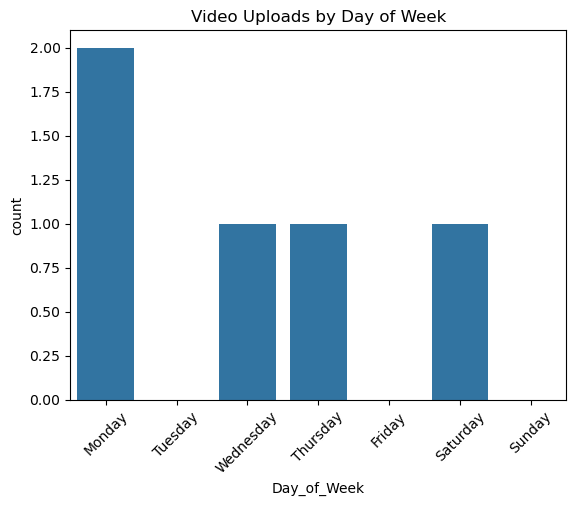

In [16]:
#What Day of Week is Best to Upload?
df['Upload_Date'] = pd.to_datetime(df['Upload_Date'])
df['Day_of_Week'] = df['Upload_Date'].dt.day_name()

sns.countplot(data=df, x='Day_of_Week', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.title("Video Uploads by Day of Week")
plt.xticks(rotation=45)
plt.show()


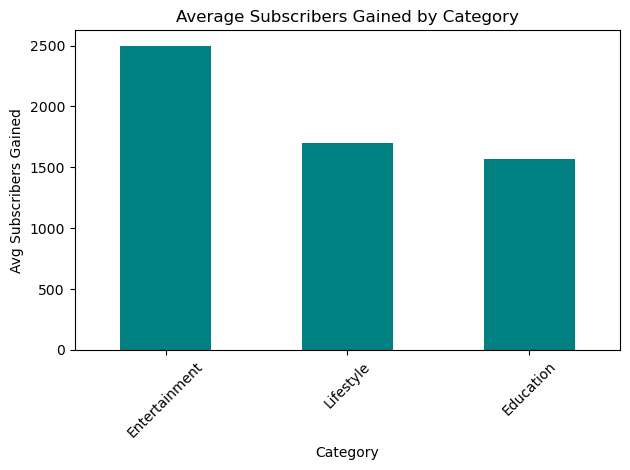

In [17]:
#Which Category Gets Most Subscribers on Average?
subs_by_cat = df.groupby('Category')['Subscribers_Gained'].mean().sort_values(ascending=False)

subs_by_cat.plot(kind='bar', color='teal')
plt.title("Average Subscribers Gained by Category")
plt.ylabel("Avg Subscribers Gained")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_10624\2304113905.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='Views', palette='Set2')


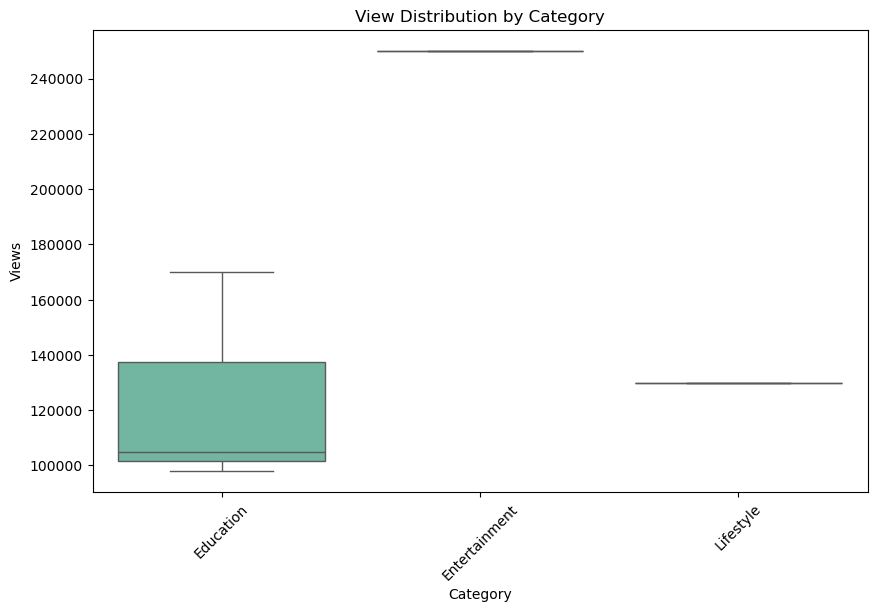

In [18]:
#Boxplot – Views Distribution per Category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='Views', palette='Set2')
plt.title("View Distribution by Category")
plt.xticks(rotation=45)
plt.show()


In [19]:
#Engagement Score Column
# Add new column: Engagement Score (likes + comments + subscribers)
df['Engagement_Score'] = df['Likes'] + df['Comments'] + df['Subscribers_Gained']
df[['Title', 'Engagement_Score']].sort_values(by='Engagement_Score', ascending=False).head(5)


,Title,Engagement_Score
2,Funniest Coding Memes,19300
3,Learn Data Science in 10 Mins,10050
4,Day in Life of a Data Analyst,8300
0,How to Learn Python Fast,6300
1,Python Project for Beginners,5450


In [20]:
#Predict Subscribers Gained (Regression – Optional)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['Views', 'Likes', 'Comments']]
y = df['Subscribers_Gained']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("🎯 Predicted Subscribers:", predictions)


🎯 Predicted Subscribers: [10590.90909091]
